## Human Activity Recognition Using Smartphones Data Set

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

#### Attribute Information:

For each record in the dataset it is provided:

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope.
- A 561-feature vector with time and frequency domain variables.
- Its activity label.
- An identifier of the subject who carried out the experiment.

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data=pd.read_csv(r'C:\Users\deewa\Desktop\Data Science Class\Machine Learning\Assignment\Project\train.csv')
train_data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
test_data=pd.read_csv(r'C:\Users\deewa\Desktop\Data Science Class\Machine Learning\Assignment\Project\test.csv')
test_data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [4]:
train_modified_data=train_data
test_modified_data=test_data

#### Label Encoding

Traget Variable is column 'Activity' in categorical form. So we will convert it into numerical via label encoding

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_modified_data['Activity']= le.fit_transform(train_modified_data.Activity)
test_modified_data['Activity']= le.fit_transform(test_modified_data.Activity)

In [6]:
train_modified_data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,2


#### Correlation Filter

Using the Pandas correlation coefficient function pd.corr(), we will form a matrix for all 
possible columns except target variable.Then use Numpy's Upper Triangle function np.triu 
with condition to only store column names where absolute value of Correlation cofficient is greater than 0.90.


In [7]:
corr_matrix=train_data.corr().abs()

In [8]:
corr_matrix.shape
upper= corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [9]:
to_drop= [column for column in upper.columns if any(upper[column]>0.90)]
len(to_drop)

359

#### Shuffling the training Data

In [10]:
from sklearn.utils import shuffle
train_modified_data=shuffle(train_modified_data, random_state=3)

#### Diving Input and Target

In [11]:
train_x=train_modified_data.iloc[:,:-1]
train_y=train_modified_data.iloc[:,-1]
test_x=test_modified_data.iloc[:,:-1]
test_y=test_modified_data.iloc[:,-1]

#### Removing features based high multi-colinearlity

Based on high multi-colinearlity between the features, we have decieded to drop one out of two columns with 
high correlation coefficient value (>0.90)

In [12]:
train_x=train_x.drop(columns=to_drop, axis=1)
test_x=test_x.drop(columns=to_drop, axis=1)

In [13]:
train_x.shape

(999, 203)

## Pipeline with SelectFromModel and RandomForestClassifier

The first method I have used is to create a pipeline with a Feature Selection and a Classifier module 
to test the results of pipeline model
    1) Feature Selection- SelectFromModel used with estimator as RandomForestClassifier.
    2) RandomForestClassifier used as the main Classifier model in the Pipeline
    3) GridSearchCV used on hyperparameters like max_features (SelectFromModel) & max_depth from RandomForestClassifier 
       to get optimum scores

In [78]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
pipeline=make_pipeline(SelectFromModel(estimator=RandomForestClassifier(), 
                                       threshold=-np.inf, max_features=80),
                      RandomForestClassifier(n_estimators=300, min_samples_leaf=2, min_samples_split=3, random_state=4))

In [79]:
from sklearn.model_selection import GridSearchCV
grid_params={
    'selectfrommodel__max_features':[50,60,70,80],
    'randomforestclassifier__max_depth':[4,5,6]
}

In [80]:
from time import time
start= time()
gs=GridSearchCV(estimator=pipeline, cv=5, param_grid=grid_params, n_jobs=-1)
gs.fit(train_x,train_y)
print("GridSearchCV took %.2f seconds." % ((time()- start)))

GridSearchCV took 39.30 seconds.


In [81]:
gs.best_params_

{'randomforestclassifier__max_depth': 6, 'selectfrommodel__max_features': 80}

In [82]:
gs.score(test_x,test_y)

0.9109109109109109

In [84]:
gs.score(train_x,train_y)

0.997997997997998

In [85]:
pipeline=gs.best_estimator_

In [86]:
pipeline.fit(train_x,train_y)

Pipeline(memory=None,
         steps=[('selectfrommodel',
                 SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                                  ccp_alpha=0.0,
                                                                  class_weight=None,
                                                                  criterion='gini',
                                                                  max_depth=None,
                                                                  max_features='auto',
                                                                  max_leaf_nodes=None,
                                                                  max_samples=None,
                                                                  min_impurity_decrease=0.0,
                                                                  min_impurity_split=None,
                                                                  min_samples_leaf=1,


In [87]:
pipeline.score(train_x, train_y)

0.996996996996997

In [88]:
pipeline.score(test_x,test_y)

0.9119119119119119

##### Cross Validation

To check for any overfitting cases, we have applied cross validation on our training set.

In [89]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(pipeline, train_x, train_y, cv=5)

In [90]:
scores

array([0.995    , 0.975    , 0.965    , 0.985    , 0.9798995])

In [91]:
from sklearn.model_selection import cross_validate
scoring_type=['precision_macro', 'recall_macro','accuracy']
scores=cross_validate(pipeline, train_x, train_y, scoring=scoring_type, cv=5)

In [92]:
scores

{'fit_time': array([2.97863102, 3.05547786, 2.97376704, 3.06019115, 2.59648585]),
 'score_time': array([0.07588339, 0.07810473, 0.07809901, 0.07036662, 0.04462075]),
 'test_precision_macro': array([0.98567251, 0.97560307, 0.96978197, 0.99031987, 0.98717949]),
 'test_recall_macro': array([0.9828869 , 0.97237671, 0.97139215, 0.98850575, 0.98214286]),
 'test_accuracy': array([0.985     , 0.975     , 0.97      , 0.99      , 0.98492462])}

#### Validation Curve

I have tried to plot Validation curve for max features & max depth vs cross validations scores over 
different range on training set

In [93]:
from sklearn.model_selection import validation_curve
param_range=np.arange(2,10,2)

train_scores, test_scores= validation_curve(pipeline,
                                           train_x, train_y,
                                           param_name='randomforestclassifier__max_depth',
                                           param_range=param_range,
                                           cv=5, scoring='accuracy',
                                           n_jobs=-1)

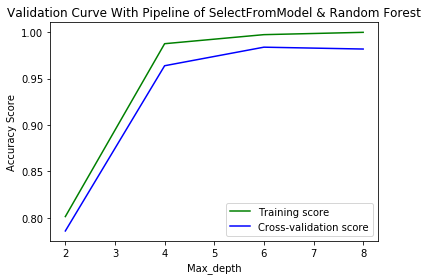

<Figure size 1152x504 with 0 Axes>

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Training score", color="green")
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

plt.title("Validation Curve With Pipeline of SelectFromModel & Random Forest")
plt.xlabel("Max_depth")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.figure(figsize=(16,7))
plt.show()

In [95]:
from sklearn.model_selection import validation_curve
param_range=np.arange(10,100,10)

train_scores, test_scores= validation_curve(pipeline,
                                           train_x, train_y,
                                           param_name='selectfrommodel__max_features',
                                           param_range=param_range,
                                           cv=5, scoring='accuracy',
                                           n_jobs=-1)

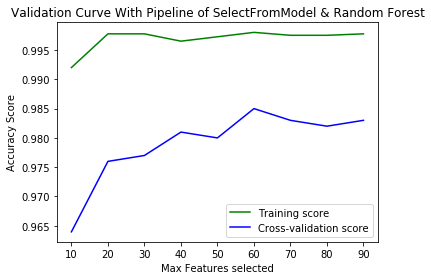

<Figure size 720x504 with 0 Axes>

In [96]:
import matplotlib.pyplot as plt
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Training score", color="green")
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

plt.title("Validation Curve With Pipeline of SelectFromModel & Random Forest")
plt.xlabel("Max Features selected")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.figure(figsize=(10,7))
plt.show()

In [97]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pipeline.predict(test_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       0.88      0.63      0.73       170
           2       0.72      0.92      0.80       178
           3       0.98      0.98      0.98       185
           4       0.97      1.00      0.99       134
           5       0.99      0.95      0.97       149

    accuracy                           0.91       999
   macro avg       0.92      0.91      0.91       999
weighted avg       0.92      0.91      0.91       999



In [33]:
test_data.Activity.value_counts()

3    185
0    183
2    178
1    170
5    149
4    134
Name: Activity, dtype: int64

##### 1st Pipeline model with SelectFromModel and RFC gave the best result. Other models are added below just to have a good comparison.

## Pipeline with SelectKBest and RandomForestClassifier

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
pipeline_2=make_pipeline(SelectKBest(score_func=f_classif), 
                         RandomForestClassifier(n_estimators=200, min_samples_leaf=2, min_samples_split=3))

In [35]:
grid_params={
    'selectkbest__k':[90,100,110],
    'randomforestclassifier__max_depth':[4,5,6]
}

In [36]:
gs=GridSearchCV(estimator=pipeline_2, cv=5, param_grid=grid_params, n_jobs=-1)
gs.fit(train_x,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('selectkbest',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x000002110B538D38>)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               m

In [37]:
gs.best_params_

{'randomforestclassifier__max_depth': 6, 'selectkbest__k': 90}

In [38]:
gs.score(test_x,test_y)

0.8858858858858859

In [39]:
gs.score(train_x,train_y)

0.994994994994995

In [40]:
pipeline_2=gs.best_estimator_

In [41]:
pipeline_2.fit(train_x,train_y)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=90,
                             score_func=<function f_classif at 0x000002110B538D38>)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=6, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=2, min_samples_split=3,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=200, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, 

In [42]:
pipeline_2.score(train_x, train_y)

0.995995995995996

In [43]:
pipeline_2.score(test_x,test_y)

0.8928928928928929

In [44]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pipeline_2.predict(test_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       0.89      0.64      0.74       170
           2       0.72      0.93      0.81       178
           3       0.97      0.98      0.98       185
           4       0.86      0.97      0.91       134
           5       0.96      0.83      0.89       149

    accuracy                           0.89       999
   macro avg       0.90      0.89      0.89       999
weighted avg       0.90      0.89      0.89       999



## Pipeline with SelectFromModel and SVM.SVC

In [45]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
pipeline_3=make_pipeline(SelectFromModel(estimator=RandomForestClassifier(), 
                                       threshold=-np.inf, max_features=80),
                      SVC(kernel='rbf', class_weight='balanced', random_state=10))

In [46]:
from sklearn.model_selection import GridSearchCV
grid_params={
    'selectfrommodel__max_features':[50,60,70],
    'svc__C':[0.01,1,10,10],
    'svc__gamma':[0.01, 1, 100]
    }

In [47]:
gs=GridSearchCV(estimator=pipeline_3, cv=5, param_grid=grid_params, n_jobs=-1)
gs.fit(train_x,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('selectfrommodel',
                                        SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                                                         ccp_alpha=0.0,
                                                                                         class_weight=None,
                                                                                         criterion='gini',
                                                                                         max_depth=None,
                                                                                         max_features='auto',
                                                                                         max_leaf_nodes=None,
                                                                                         max_samples=None,
    

In [48]:
gs.best_params_

{'selectfrommodel__max_features': 70, 'svc__C': 10, 'svc__gamma': 0.01}

In [49]:
gs.score(test_x,test_y)

0.8448448448448449

In [50]:
gs.score(train_x,train_y)

0.98998998998999

In [51]:
pipeline_3=gs.best_estimator_

In [52]:
pipeline_3.fit(train_x,train_y)

Pipeline(memory=None,
         steps=[('selectfrommodel',
                 SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                                  ccp_alpha=0.0,
                                                                  class_weight=None,
                                                                  criterion='gini',
                                                                  max_depth=None,
                                                                  max_features='auto',
                                                                  max_leaf_nodes=None,
                                                                  max_samples=None,
                                                                  min_impurity_decrease=0.0,
                                                                  min_impurity_split=None,
                                                                  min_samples_leaf=1,


In [53]:
pipeline_3.score(train_x, train_y)

0.994994994994995

In [54]:
pipeline_3.score(test_x,test_y)

0.8268268268268268

In [55]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pipeline_3.predict(test_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       0.73      0.59      0.65       170
           2       0.66      0.85      0.74       178
           3       0.97      0.83      0.89       185
           4       0.72      1.00      0.84       134
           5       0.97      0.70      0.82       149

    accuracy                           0.83       999
   macro avg       0.84      0.83      0.82       999
weighted avg       0.85      0.83      0.83       999



## Pipeline with SelectFromModel, PCA and RandomForestClassifier

In [56]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
pipeline_4=make_pipeline(PCA(), SelectFromModel(estimator=RandomForestClassifier(), 
                                       threshold=-np.inf, max_features=80),
                         RandomForestClassifier(n_estimators=300, min_samples_leaf=2, min_samples_split=3))

In [57]:
from sklearn.model_selection import GridSearchCV
grid_params={
    'selectfrommodel__max_features':[20,30,40],
    'pca__n_components':[50, 60, 70],
    'randomforestclassifier__max_depth':[4,5,6]
}

In [58]:
gs=GridSearchCV(estimator=pipeline_4, cv=5, param_grid=grid_params, n_jobs=-1)
gs.fit(train_x,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('selectfrommodel',
                                        SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                                                         ccp_alpha=0.0,
                                                                                         class_weight=None,
                                                                                         criterion='gini',
                                                     

In [59]:
gs.best_params_

{'pca__n_components': 60,
 'randomforestclassifier__max_depth': 6,
 'selectfrommodel__max_features': 40}

In [60]:
gs.score(test_x,test_y)

0.7807807807807807

In [61]:
gs.score(train_x,train_y)

0.992992992992993

In [62]:
pipeline_4=gs.best_estimator_

In [63]:
pipeline_4.fit(train_x,train_y)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=60,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('selectfrommodel',
                 SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                                  ccp_alpha=0.0,
                                                                  class_weight=None,
                                                                  criterion='gini',
                                                                  max_depth=None,
                                                                  max_features='auto',
                                                                  max_leaf_nodes=None,
                                                                  max_samples=None,...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=

In [64]:
pipeline_4.score(train_x, train_y)

0.990990990990991

In [65]:
pipeline_4.score(test_x,test_y)

0.7697697697697697

In [66]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pipeline_4.predict(test_x)))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       183
           1       0.80      0.44      0.56       170
           2       0.64      0.93      0.76       178
           3       0.85      0.61      0.71       185
           4       0.66      0.87      0.75       134
           5       0.84      0.89      0.86       149

    accuracy                           0.77       999
   macro avg       0.79      0.78      0.76       999
weighted avg       0.79      0.77      0.76       999



## Pipeline with SelectFromModel and Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
pipeline_5=make_pipeline(SelectFromModel(estimator=RandomForestClassifier(), 
                                       threshold=-np.inf, max_features=80),
                      LogisticRegression(C=1, solver='saga',max_iter=1000, random_state=4, class_weight='balanced'))

In [68]:
from sklearn.model_selection import GridSearchCV
grid_params={
    'selectfrommodel__max_features':[50,60,70],
    'logisticregression__C':[0.01,1,10],
    'logisticregression__max_iter':[750,1000]
}

In [69]:
gs=GridSearchCV(estimator=pipeline_5, cv=5, param_grid=grid_params, n_jobs=-1)
gs.fit(train_x,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('selectfrommodel',
                                        SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                                                         ccp_alpha=0.0,
                                                                                         class_weight=None,
                                                                                         criterion='gini',
                                                                                         max_depth=None,
                                                                                         max_features='auto',
                                                                                         max_leaf_nodes=None,
                                                                                         max_samples=None,
    

In [70]:
gs.best_params_

{'logisticregression__C': 10,
 'logisticregression__max_iter': 750,
 'selectfrommodel__max_features': 70}

In [71]:
gs.score(test_x,test_y)

0.8338338338338338

In [72]:
gs.score(train_x,train_y)

0.998998998998999

In [73]:
pipeline_5=gs.best_estimator_

In [74]:
pipeline_5.fit(train_x,train_y)

Pipeline(memory=None,
         steps=[('selectfrommodel',
                 SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                                  ccp_alpha=0.0,
                                                                  class_weight=None,
                                                                  criterion='gini',
                                                                  max_depth=None,
                                                                  max_features='auto',
                                                                  max_leaf_nodes=None,
                                                                  max_samples=None,
                                                                  min_impurity_decrease=0.0,
                                                                  min_impurity_split=None,
                                                                  min_samples_leaf=1,


In [75]:
pipeline_5.score(train_x, train_y)

0.998998998998999

In [76]:
pipeline_5.score(test_x,test_y)

0.8318318318318318

In [77]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pipeline_5.predict(test_x)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       183
           1       0.63      0.61      0.62       170
           2       0.67      0.84      0.75       178
           3       0.96      0.83      0.89       185
           4       0.85      1.00      0.92       134
           5       0.96      0.74      0.83       149

    accuracy                           0.83       999
   macro avg       0.85      0.83      0.83       999
weighted avg       0.85      0.83      0.83       999

